I found out that the dataset is synthetic. That is why the analysis give unintuitive results.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [6]:
df <- read_csv("../../data/heart_attack_prediction_dataset.csv")

spec(df)

Rows: 8763 Columns: 26
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): Patient ID, Sex, Blood Pressure, Diet, Country, Continent, Hemisphere
dbl (19): Age, Cholesterol, Heart Rate, Diabetes, Family History, Smoking, O...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


cols(
  `Patient ID` = col_character(),
  Age = col_double(),
  Sex = col_character(),
  Cholesterol = col_double(),
  `Blood Pressure` = col_character(),
  `Heart Rate` = col_double(),
  Diabetes = col_double(),
  `Family History` = col_double(),
  Smoking = col_double(),
  Obesity = col_double(),
  `Alcohol Consumption` = col_double(),
  `Exercise Hours Per Week` = col_double(),
  Diet = col_character(),
  `Previous Heart Problems` = col_double(),
  `Medication Use` = col_double(),
  `Stress Level` = col_double(),
  `Sedentary Hours Per Day` = col_double(),
  Income = col_double(),
  BMI = col_double(),
  Triglycerides = col_double(),
  `Physical Activity Days Per Week` = col_double(),
  `Sleep Hours Per Day` = col_double(),
  Country = col_character(),
  Continent = col_character(),
  Hemisphere = col_character(),
  `Heart Attack Risk` = col_double()
)

In [9]:
# All the countries in the dataset
df %>%
    select(Country) %>%
    unique()

Country
<chr>
Argentina
Canada
France
Thailand
Germany
Japan
Brazil
South Africa
United States


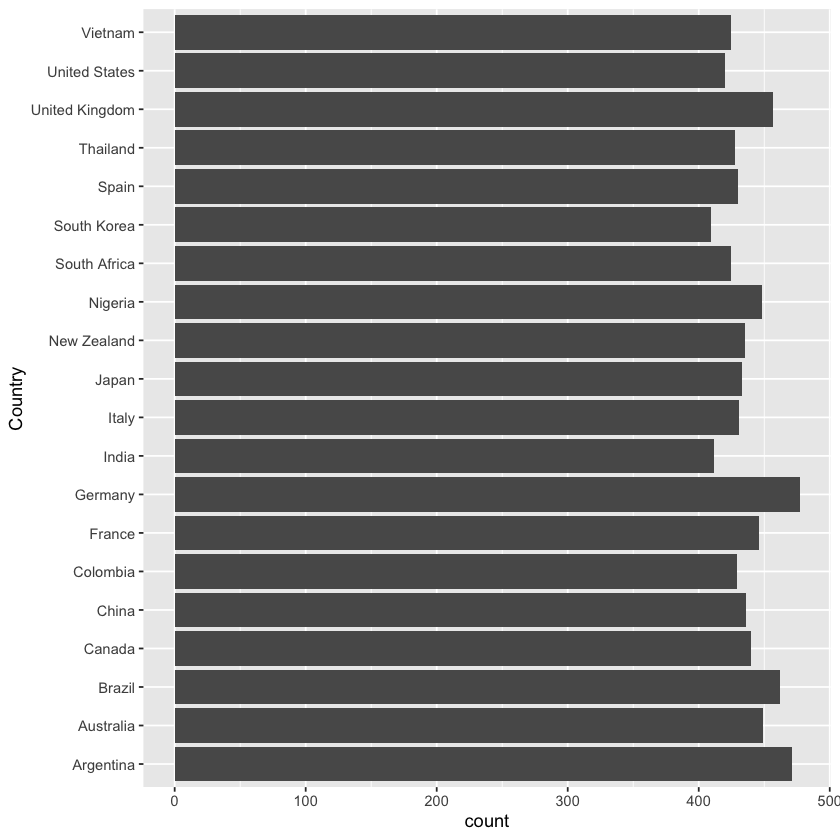

In [14]:
# Balance of countries
df %>%
    ggplot() +
    geom_bar(aes(x=Country), stat='count') +
    coord_flip()

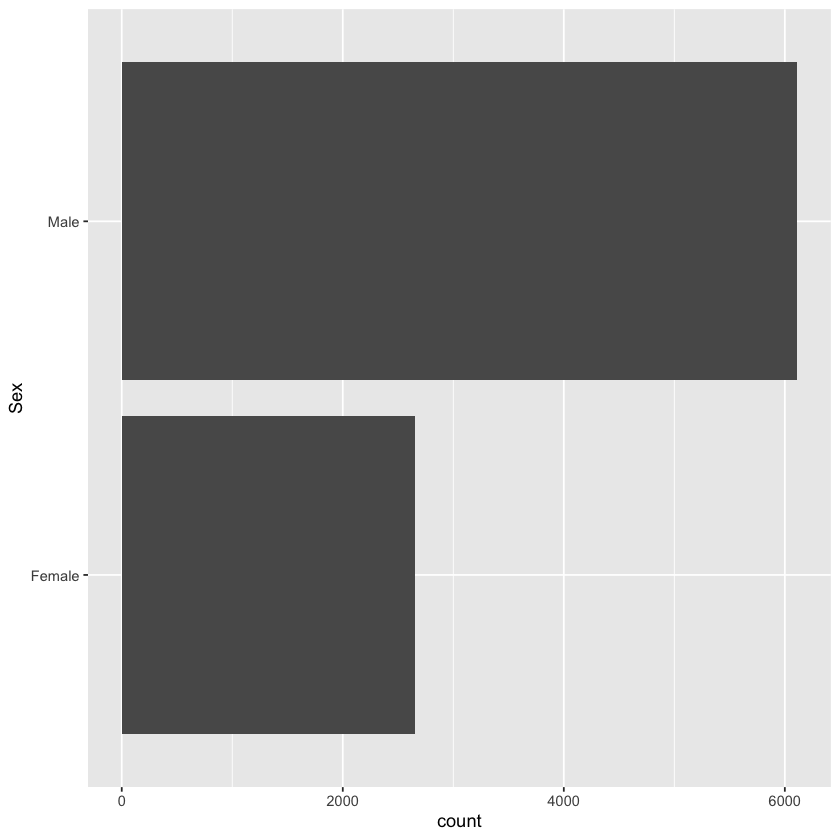

In [15]:
# Balance between Sex
# Balance of countries
df %>%
    ggplot() +
    geom_bar(aes(x=Sex), stat='count') +
    coord_flip()

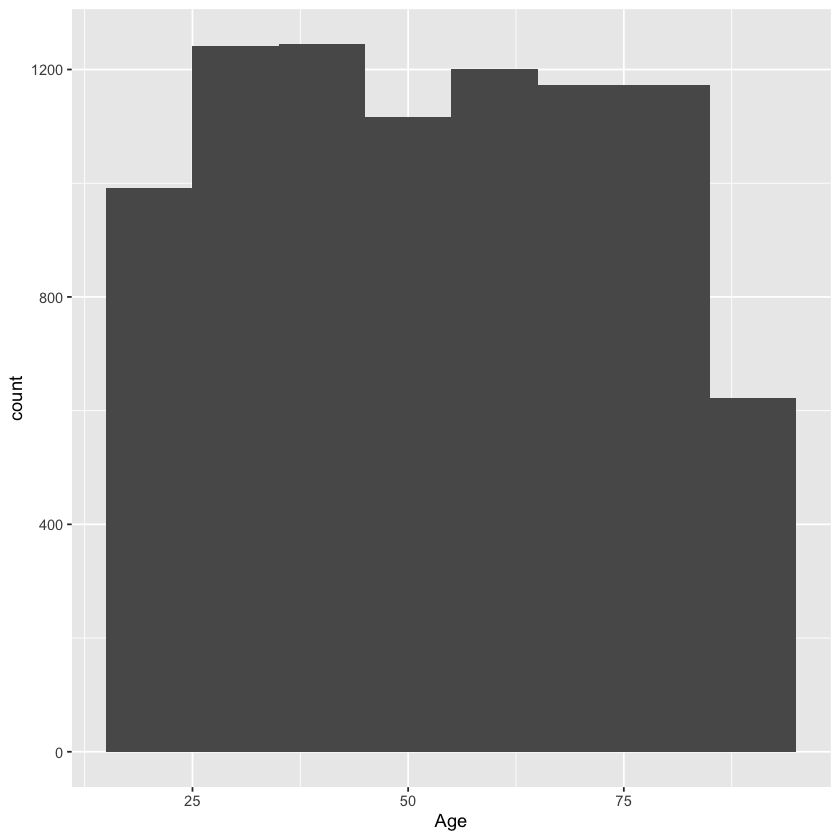

In [24]:
# Balance of age
df %>%
    ggplot() +
    geom_histogram(aes(x=Age), binwidth=10)

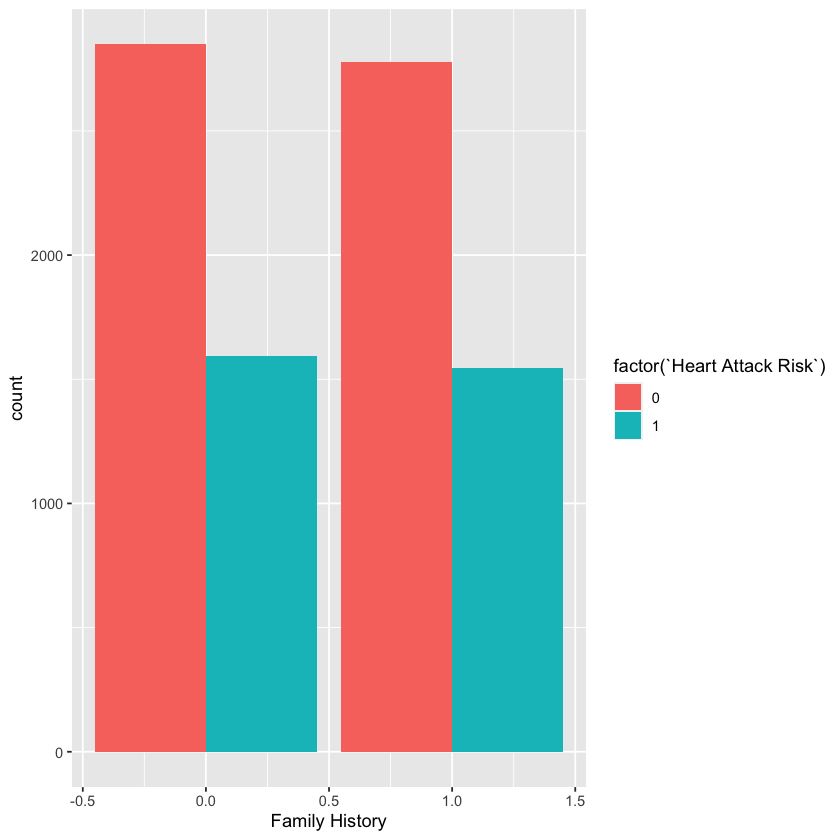

In [55]:
# Is there a relationship between family history and heart disease?
df %>%
    ggplot() +
    geom_bar(aes(x=`Family History`, group=`Heart Attack Risk`, fill=factor(`Heart Attack Risk`)), position=position_dodge())

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


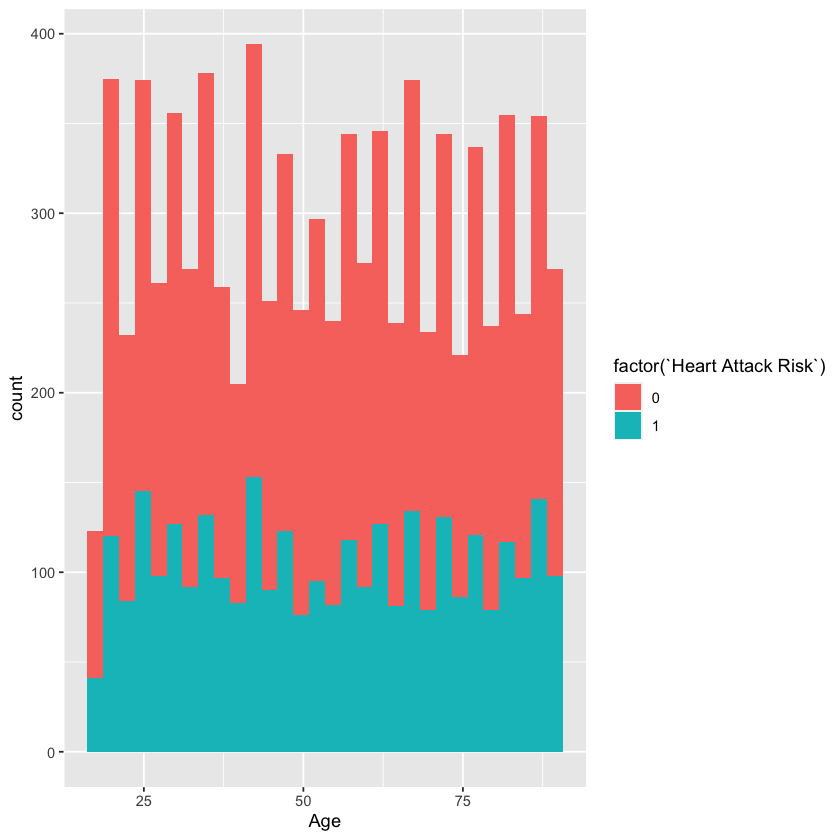

In [54]:
# Q: If you are younger and have a heart attack it is more likely to be familial?
df %>%
    ggplot() +
    geom_histogram(aes(x=`Age`, group=`Heart Attack Risk`, fill=factor(`Heart Attack Risk`)))

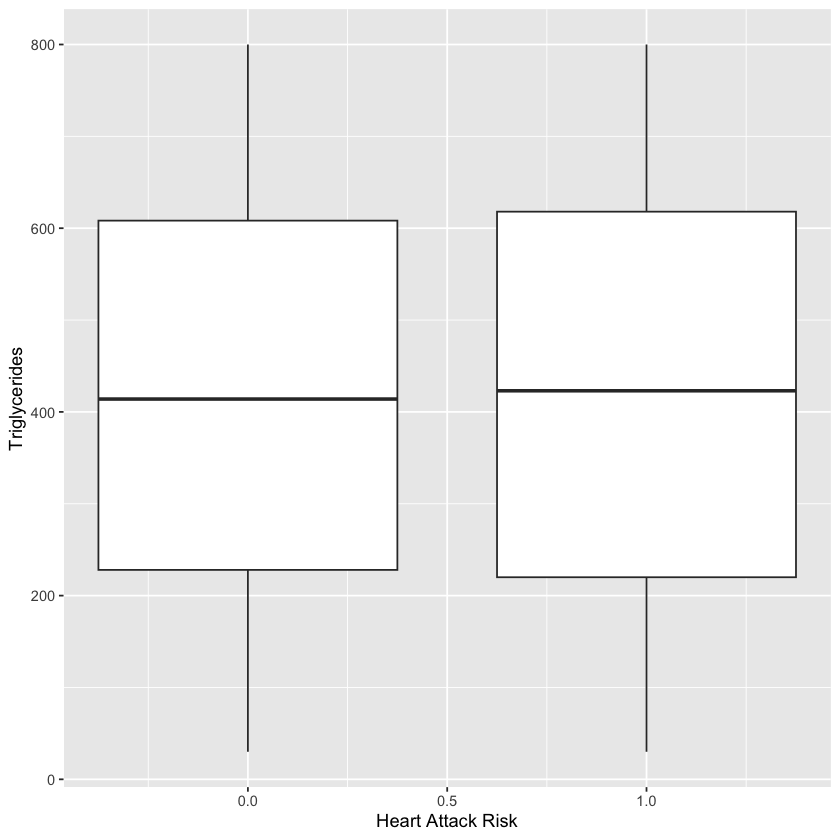

In [43]:
# Is there a relationship between high blood fats and heart attack?
df %>%
    ggplot() +
    geom_boxplot(aes(x=`Heart Attack Risk`, y=`Triglycerides`, group=`Heart Attack Risk`))

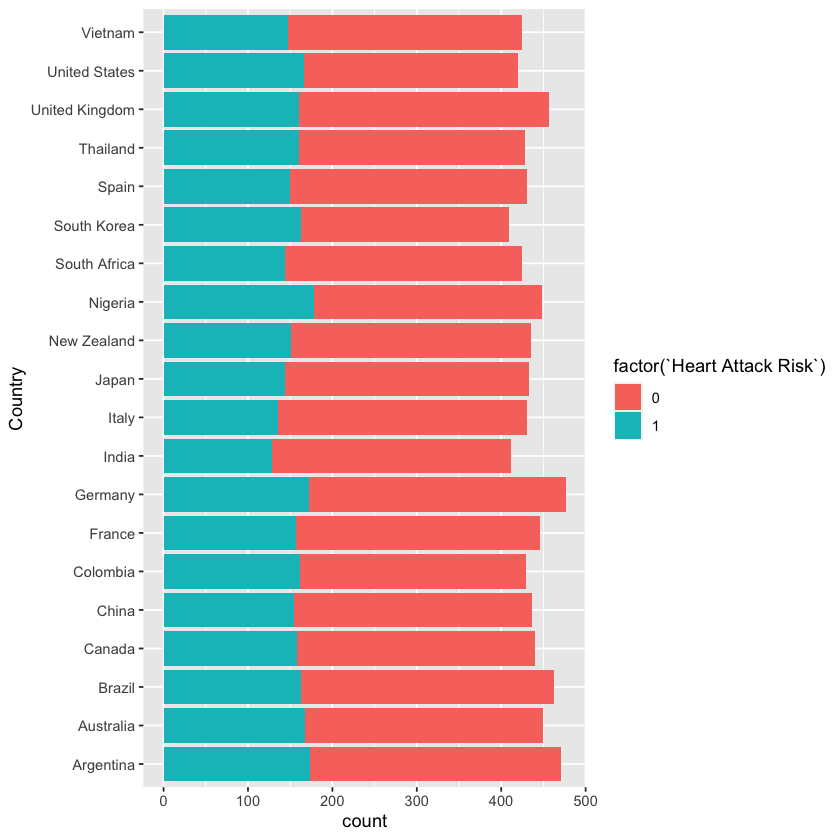

In [53]:
# Heart attack frequency per country
df %>%
    ggplot() +
    geom_bar(aes(x=Country, group=`Heart Attack Risk`, fill=factor(`Heart Attack Risk`))) + 
    coord_flip()